0.94
[[48  2]
 [ 4 46]]
[[ 1.91879785 -0.22805912]]


<IPython.core.display.Javascript object>


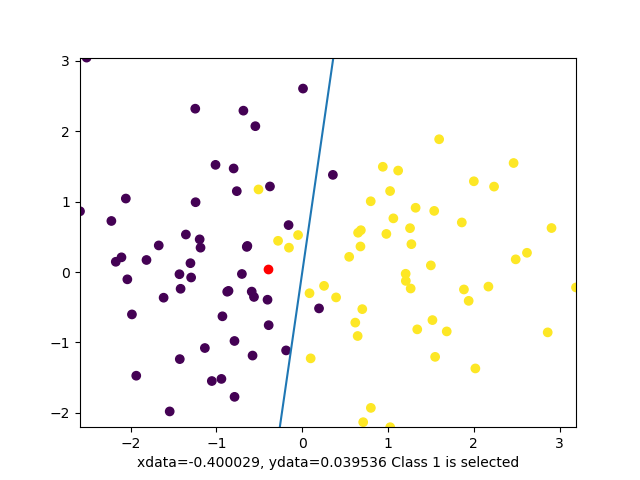

In [1]:
%matplotlib notebook
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
clf = SVC(kernel="linear",degree=1)
clf.fit(X, y)
pred = clf.predict(X)

print(accuracy_score(y, pred))
print(confusion_matrix(y, pred))
print(clf.coef_)

minX0D = np.min(X[:, 0])
maxX0D = np.max(X[:, 0])
minX1D = np.min(X[:, 1])
maxX1D = np.max(X[:, 1])
minX1 = (-clf.intercept_-clf.coef_[0,0]*minX0D)/clf.coef_[0,1]
maxX1 = (-clf.intercept_-clf.coef_[0,0]*maxX0D)/clf.coef_[0,1]

fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.plot([minX0D,maxX0D],[minX1,maxX1])
ax.set_xlim([minX0D, maxX0D])
ax.set_ylim([minX1D, maxX1D])

text=plt.xlabel("No selection yet")

def onclick(event):
    if event.inaxes is not None:
        tx = 'xdata=%f, ydata=%f' % (event.xdata, event.ydata)
        if (-clf.intercept_-clf.coef_[0,0]*event.xdata)/clf.coef_[0,1]<event.ydata:
            tx = tx + ' Class 1 is selected'
        else:
            tx = tx + ' Class 2 is selected'
        plt.cla()
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
        plt.plot([minX0D,maxX0D],[minX1,maxX1])
        ax.set_xlim([minX0D, maxX0D])
        ax.set_ylim([minX1D, maxX1D])
        ax.scatter([event.xdata],[event.ydata],c='r')
            
        text.set_text(tx)
        fig.canvas.draw()
    else:
        print('Clicked outside of an axis.')

cid = fig.canvas.mpl_connect('button_press_event', onclick)